<a href="https://colab.research.google.com/github/teatreewealth/ttwealth_TFR_simulation/blob/main/TFR_capitalisation_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valore finale TFR in azienda (calcolo iterativo): €68715.20
Valore finale TFR in fondo pensione (calcolo iterativo): €79985.88


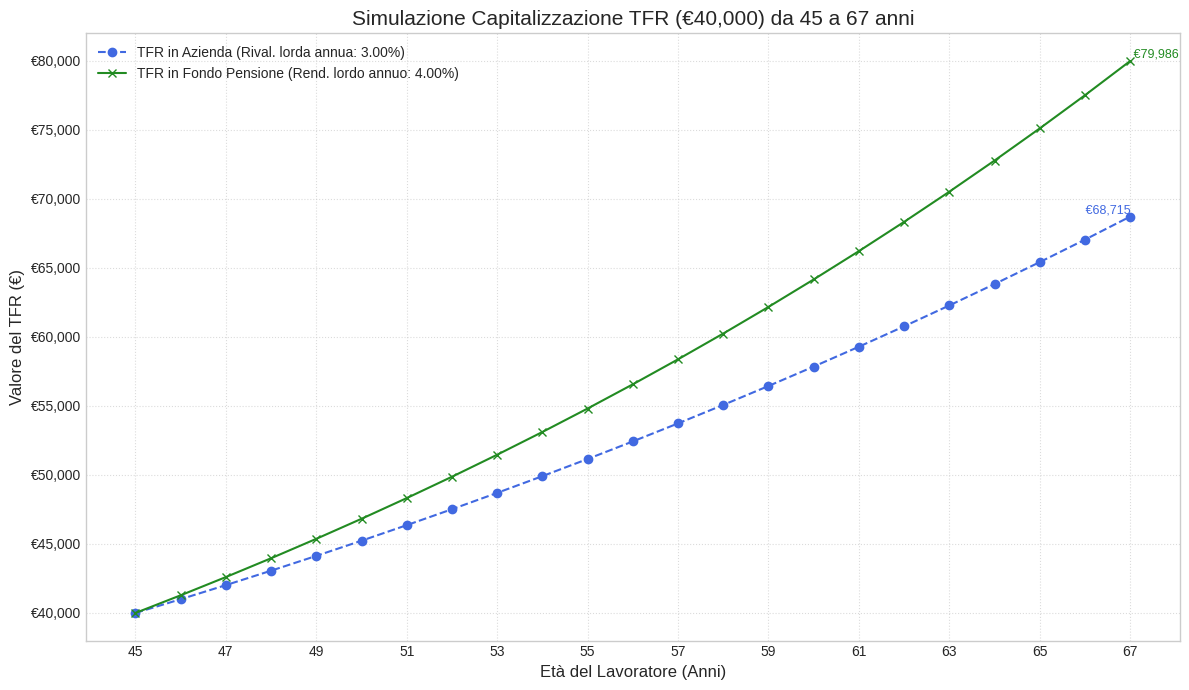

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Dati iniziali
anni_mancanti = 22
tfr_iniziale = 40000.0
eta_attuale = 45
eta_pensione = 67

# Ipotesi
inflazione_media_annua = 0.02 # 2%

# --- Scenario 1: TFR in azienda ---
tasso_fisso_azienda = 0.015 # 1.5%
percentuale_inflazione_rivalutazione = 0.75
imposta_rivalutazione_azienda = 0.17 # 17%

tasso_rivalutazione_azienda_lordo_annuo = tasso_fisso_azienda + (percentuale_inflazione_rivalutazione * inflazione_media_annua) # 1.5% + (0.75 * 2%) = 3%

# --- Scenario 2: TFR in fondo pensione ---
rendimento_fondo_lordo_annuo = 0.04 # 4%
imposta_rendimenti_fondo = 0.20 # 20%

# Array per memorizzare l'evoluzione annuale
anni_grafico = np.arange(0, anni_mancanti + 1) # Da anno 0 (oggi) ad anno 22
eta_lavoratore_grafico = np.arange(eta_attuale, eta_pensione + 1)

tfr_azienda_evoluzione = np.zeros(len(anni_grafico))
tfr_fondo_evoluzione = np.zeros(len(anni_grafico))

# Impostazione valori iniziali
tfr_azienda_evoluzione[0] = tfr_iniziale
tfr_fondo_evoluzione[0] = tfr_iniziale

# Calcolo iterativo anno per anno
for i in range(1, len(anni_grafico)):
    # TFR in azienda
    rivalutazione_annua_lorda_azienda = tfr_azienda_evoluzione[i-1] * tasso_rivalutazione_azienda_lordo_annuo
    imposta_su_rivalutazione_azienda = rivalutazione_annua_lorda_azienda * imposta_rivalutazione_azienda
    rivalutazione_annua_netta_azienda = rivalutazione_annua_lorda_azienda - imposta_su_rivalutazione_azienda
    tfr_azienda_evoluzione[i] = tfr_azienda_evoluzione[i-1] + rivalutazione_annua_netta_azienda

    # TFR in fondo pensione
    rendimento_annuo_lordo_fondo = tfr_fondo_evoluzione[i-1] * rendimento_fondo_lordo_annuo
    imposta_su_rendimento_fondo = rendimento_annuo_lordo_fondo * imposta_rendimenti_fondo
    rendimento_annuo_netto_fondo = rendimento_annuo_lordo_fondo - imposta_su_rendimento_fondo
    tfr_fondo_evoluzione[i] = tfr_fondo_evoluzione[i-1] + rendimento_annuo_netto_fondo

# Stampa dei valori finali calcolati anno per anno (per verifica)
print(f"Valore finale TFR in azienda (calcolo iterativo): €{tfr_azienda_evoluzione[-1]:.2f}")
print(f"Valore finale TFR in fondo pensione (calcolo iterativo): €{tfr_fondo_evoluzione[-1]:.2f}")

# Creazione del grafico
plt.style.use('seaborn-v0_8-whitegrid') # Stile del grafico
plt.figure(figsize=(12, 7))

plt.plot(eta_lavoratore_grafico, tfr_azienda_evoluzione, label=f'TFR in Azienda (Rival. lorda annua: {tasso_rivalutazione_azienda_lordo_annuo*100:.2f}%)', marker='o', linestyle='--', color='royalblue')
plt.plot(eta_lavoratore_grafico, tfr_fondo_evoluzione, label=f'TFR in Fondo Pensione (Rend. lordo annuo: {rendimento_fondo_lordo_annuo*100:.2f}%)', marker='x', linestyle='-', color='forestgreen')

# Formattazione dell'asse Y per mostrare valori in Euro
import matplotlib.ticker as mtick
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

plt.title(f'Simulazione Capitalizzazione TFR (€{tfr_iniziale:,.0f}) da {eta_attuale} a {eta_pensione} anni', fontsize=15)
plt.xlabel('Età del Lavoratore (Anni)', fontsize=12)
plt.ylabel('Valore del TFR (€)', fontsize=12)
plt.xticks(np.arange(eta_attuale, eta_pensione + 1, 2)) # Etichette età ogni 2 anni
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout() # Ottimizza layout

# Aggiunta di testo con i valori finali sul grafico
plt.text(eta_lavoratore_grafico[-1], tfr_azienda_evoluzione[-1], f' €{tfr_azienda_evoluzione[-1]:,.0f}', va='bottom', ha='right', color='royalblue', fontsize=9)
plt.text(eta_lavoratore_grafico[-1], tfr_fondo_evoluzione[-1], f' €{tfr_fondo_evoluzione[-1]:,.0f}', va='bottom', ha='left', color='forestgreen', fontsize=9)


plt.show()